# Анализ данных по проекту "Совесть"

### Импорт библиотек
Здесь нам потребуются следующие библиотеки
- pandas — программная библиотека на языке Python для обработки и анализа данных.
- numpy — библиотека с поддержкой многомерных массивов и высокоуровневых математических функций, предназначенных для работы с многомерными массивами
- pydot — это интерфейс для Graphviz, может анализировать и выводить на язык DOT, используемый GraphViz,
- sklearn — библиотека машинного обучения для языка программирования Python.
- matplotlib — библиотека на языке программирования Python для визуализации данных двумерной графикой
- seaborn — библиотека визуализации данных Python, основанная на matplotlib. Он предоставляет высокоуровневый интерфейс для рисования информативной статистической графики.

In [1]:
import pandas as pd
import numpy as np
import pydot as p
from sklearn.model_selection import cross_validate, GridSearchCV, train_test_split
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from sklearn import tree, linear_model, metrics, pipeline, preprocessing
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  classification_report, confusion_matrix
from sklearn.tree import export_graphviz  
from IPython.display import Image
%pylab inline
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


### Импорт данных
Импортируем полученную ранее таблицу "result.xlsx"

In [2]:
df = pd.read_excel("C:/Users/Ренат/Desktop/Sovest/SOVEST.xlsx")

##### Изучим данные

In [3]:
df.head()

,APPLICID,ApprovedCreditSum,Sex,Age,AddressIdentical,FactCity,EducationStatus,FamilyStatus,OrgStanding,KolichestvoDetejMladshe18,...,BlockDur,BlockCnt,Circle,AllCLC,PayMax,BadAddressHome,BadAddressWork,ScoreBinary,ScoreProba,AfsSumm
0,0002_69__002171,2,1,0,1,2.0,3,0.0,0,0,...,0.0,0.0,4.0,3.0,5.0,0.0,0.0,1.0,4.0,1
1,0002_69__069920,2,0,1,0,2.0,4,0.0,1,0,...,4.0,3.0,5.0,4.0,3.0,0.0,0.0,1.0,2.0,5
2,0002_69__062487,2,0,0,1,1.0,4,1.0,2,1,...,4.0,3.0,5.0,3.0,3.0,0.0,0.0,0.0,2.0,6
3,0002_69__051416,0,1,0,0,1.0,2,0.0,0,0,...,2.0,2.0,3.0,3.0,3.0,0.0,0.0,0.0,NaN,0
4,0002_69__029594,2,0,0,0,2.0,1,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0


Выводим статистику по значениям признаков: 
среднее, стандартное отклонение, минимальное и максимальное значения, квартили

In [4]:
df.describe()

,ApprovedCreditSum,Sex,Age,AddressIdentical,FactCity,EducationStatus,FamilyStatus,OrgStanding,KolichestvoDetejMladshe18,ConfirmedMonthlyIncome,...,BlockDur,BlockCnt,Circle,AllCLC,PayMax,BadAddressHome,BadAddressWork,ScoreBinary,ScoreProba,AfsSumm
count,56645.000000,56645.000000,56645.000000,56645.000000,52295.000000,56645.000000,52359.000000,56645.000000,56645.000000,56645.000000,...,56633.000000,56633.000000,56633.000000,56633.000000,56633.00000,56633.000000,56633.000000,56379.000000,43121.000000,56645.000000
mean,1.630629,0.433436,1.603019,0.742484,1.058342,2.791915,0.700930,1.594421,0.436526,2.676829,...,1.329878,1.225010,3.820140,2.673494,3.07538,0.087617,0.082885,0.273861,1.423089,0.653279
std,1.064350,0.495554,1.225495,0.437270,0.894297,1.138092,0.685727,1.219908,0.713656,0.906785,...,1.462890,1.336908,1.639604,1.211711,1.45257,0.282739,0.275710,0.445942,1.386383,1.585022
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,2.000000,...,0.000000,0.000000,3.000000,2.000000,3.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,3.000000,...,1.000000,1.000000,5.000000,3.000000,3.00000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2.000000,1.000000,3.000000,1.000000,2.000000,4.000000,1.000000,2.000000,1.000000,3.000000,...,2.000000,2.000000,5.000000,3.000000,4.00000,0.000000,0.000000,1.000000,2.000000,0.000000
max,5.000000,1.000000,4.000000,1.000000,2.000000,6.000000,3.000000,5.000000,4.000000,7.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,1.000000,1.000000,1.000000,4.000000,6.000000


Узнаем количество переменных, формат и наличие null-значений

In [5]:
df.info()
df.isnull().any().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56645 entries, 0 to 56644
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   APPLICID                       56645 non-null  object 
 1   ApprovedCreditSum              56645 non-null  int64  
 2   Sex                            56645 non-null  int64  
 3   Age                            56645 non-null  int64  
 4   AddressIdentical               56645 non-null  int64  
 5   FactCity                       52295 non-null  float64
 6   EducationStatus                56645 non-null  int64  
 7   FamilyStatus                   52359 non-null  float64
 8   OrgStanding                    56645 non-null  int64  
 9   KolichestvoDetejMladshe18      56645 non-null  int64  
 10  ConfirmedMonthlyIncome         56645 non-null  int64  
 11  SumOtherPayment                56645 non-null  int64  
 12  CountRequest                   56645 non-null 

True

Заменяем missing'и
- Интервальные, бинарные и ординальные заменяются на 0
- Номинальные заменяются на -1

In [6]:
df['FactCity'] = df['FactCity'].fillna(-1)
df['FamilyStatus'] = df['FamilyStatus'].fillna(-1)


df['ScoreFICO'] = df['ScoreFICO'].fillna(0)
df['CreditHistoryStopFactors'] = df['CreditHistoryStopFactors'].fillna(0)
df['PTI'] = df['PTI'].fillna(0)
df['MainScoreValue'] = df['MainScoreValue'].fillna(0)
df['Score'] = df['Score'].fillna(0)
df['LifeTimeBin'] = df['LifeTimeBin'].fillna(0)
df['BlockDur'] = df['BlockDur'].fillna(0)
df['BlockCnt'] = df['BlockCnt'].fillna(0)
df['Circle'] = df['Circle'].fillna(0)
df['AllCLC'] = df['AllCLC'].fillna(0)
df['PayMax'] = df['PayMax'].fillna(0)
df['BadAddressHome'] = df['BadAddressHome'].fillna(0)
df['BadAddressWork'] = df['BadAddressWork'].fillna(0)
df['ScoreBinary'] = df['ScoreBinary'].fillna(0)
df['ScoreProba'] = df['ScoreProba'].fillna(0)

Проверим ещё раз

In [7]:
df.info()
df.isnull().any().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56645 entries, 0 to 56644
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   APPLICID                       56645 non-null  object 
 1   ApprovedCreditSum              56645 non-null  int64  
 2   Sex                            56645 non-null  int64  
 3   Age                            56645 non-null  int64  
 4   AddressIdentical               56645 non-null  int64  
 5   FactCity                       56645 non-null  float64
 6   EducationStatus                56645 non-null  int64  
 7   FamilyStatus                   56645 non-null  float64
 8   OrgStanding                    56645 non-null  int64  
 9   KolichestvoDetejMladshe18      56645 non-null  int64  
 10  ConfirmedMonthlyIncome         56645 non-null  int64  
 11  SumOtherPayment                56645 non-null  int64  
 12  CountRequest                   56645 non-null 

False

### Визуализация данных
Визуализируем данные с помощью matplotlib

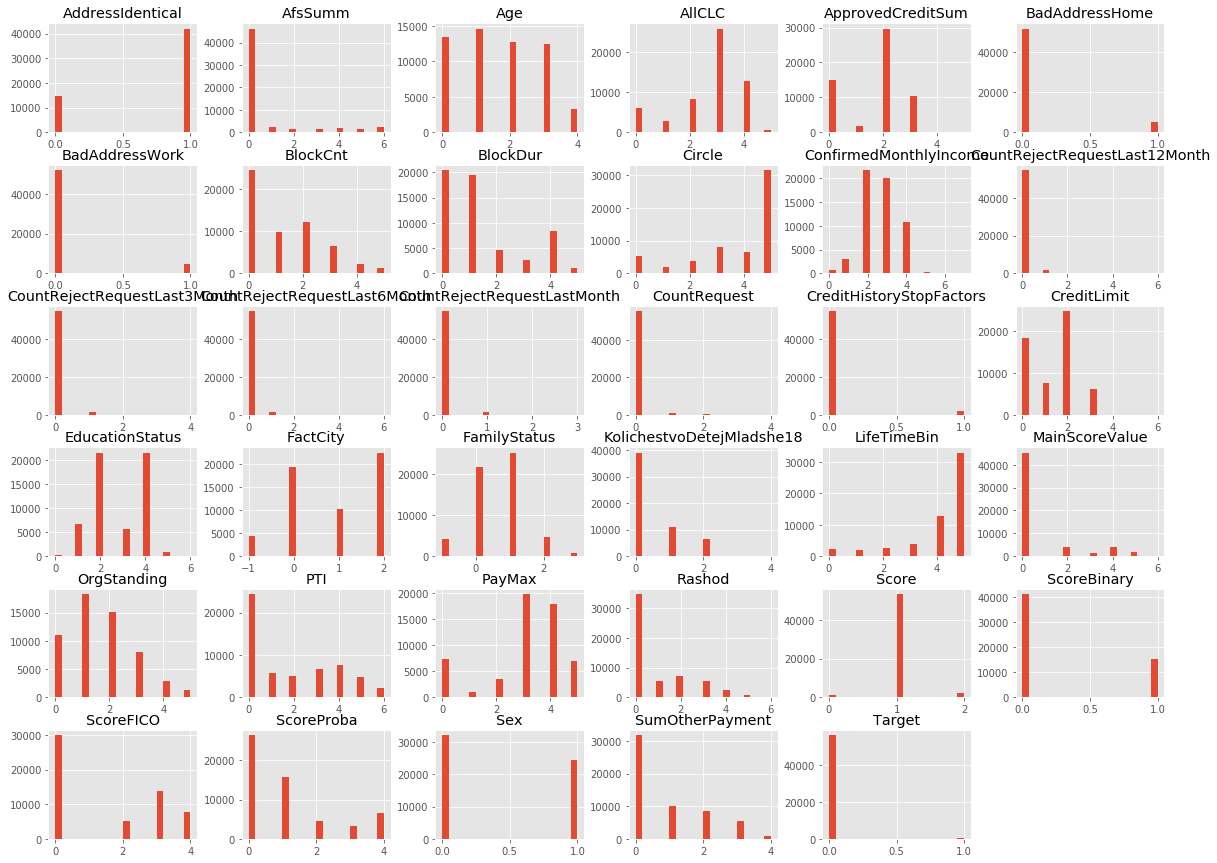

In [8]:
df.hist(bins=20, figsize=(20,15))
plt.show()

##### Визуализируем корреляцию между признаками

Корреляция — взаимозависимость  двух или нескольких случайных величин. Суть ее заключается в том, что при изменении значения одной переменной происходит закономерное изменение (уменьшению или увеличению) другой(-их) переменной(-ых).
При расчете корреляций пытаются определить, существует ли статистически достоверная связь между двумя или несколькими переменными в одной или нескольких выборках.

В Pandas'e используется 3 метода метода корреляции:
- Коэффициент ранговой корреляции Кендалла
- Коэффициент корреляции Пирсона
- Коэффициент ранговой корреляции Спирмена

Показатели коэффициента корреляции:
- -1 - корреляция отрицательна
- 0 - корреляция отсутствует
- 1 - корреляция положительна

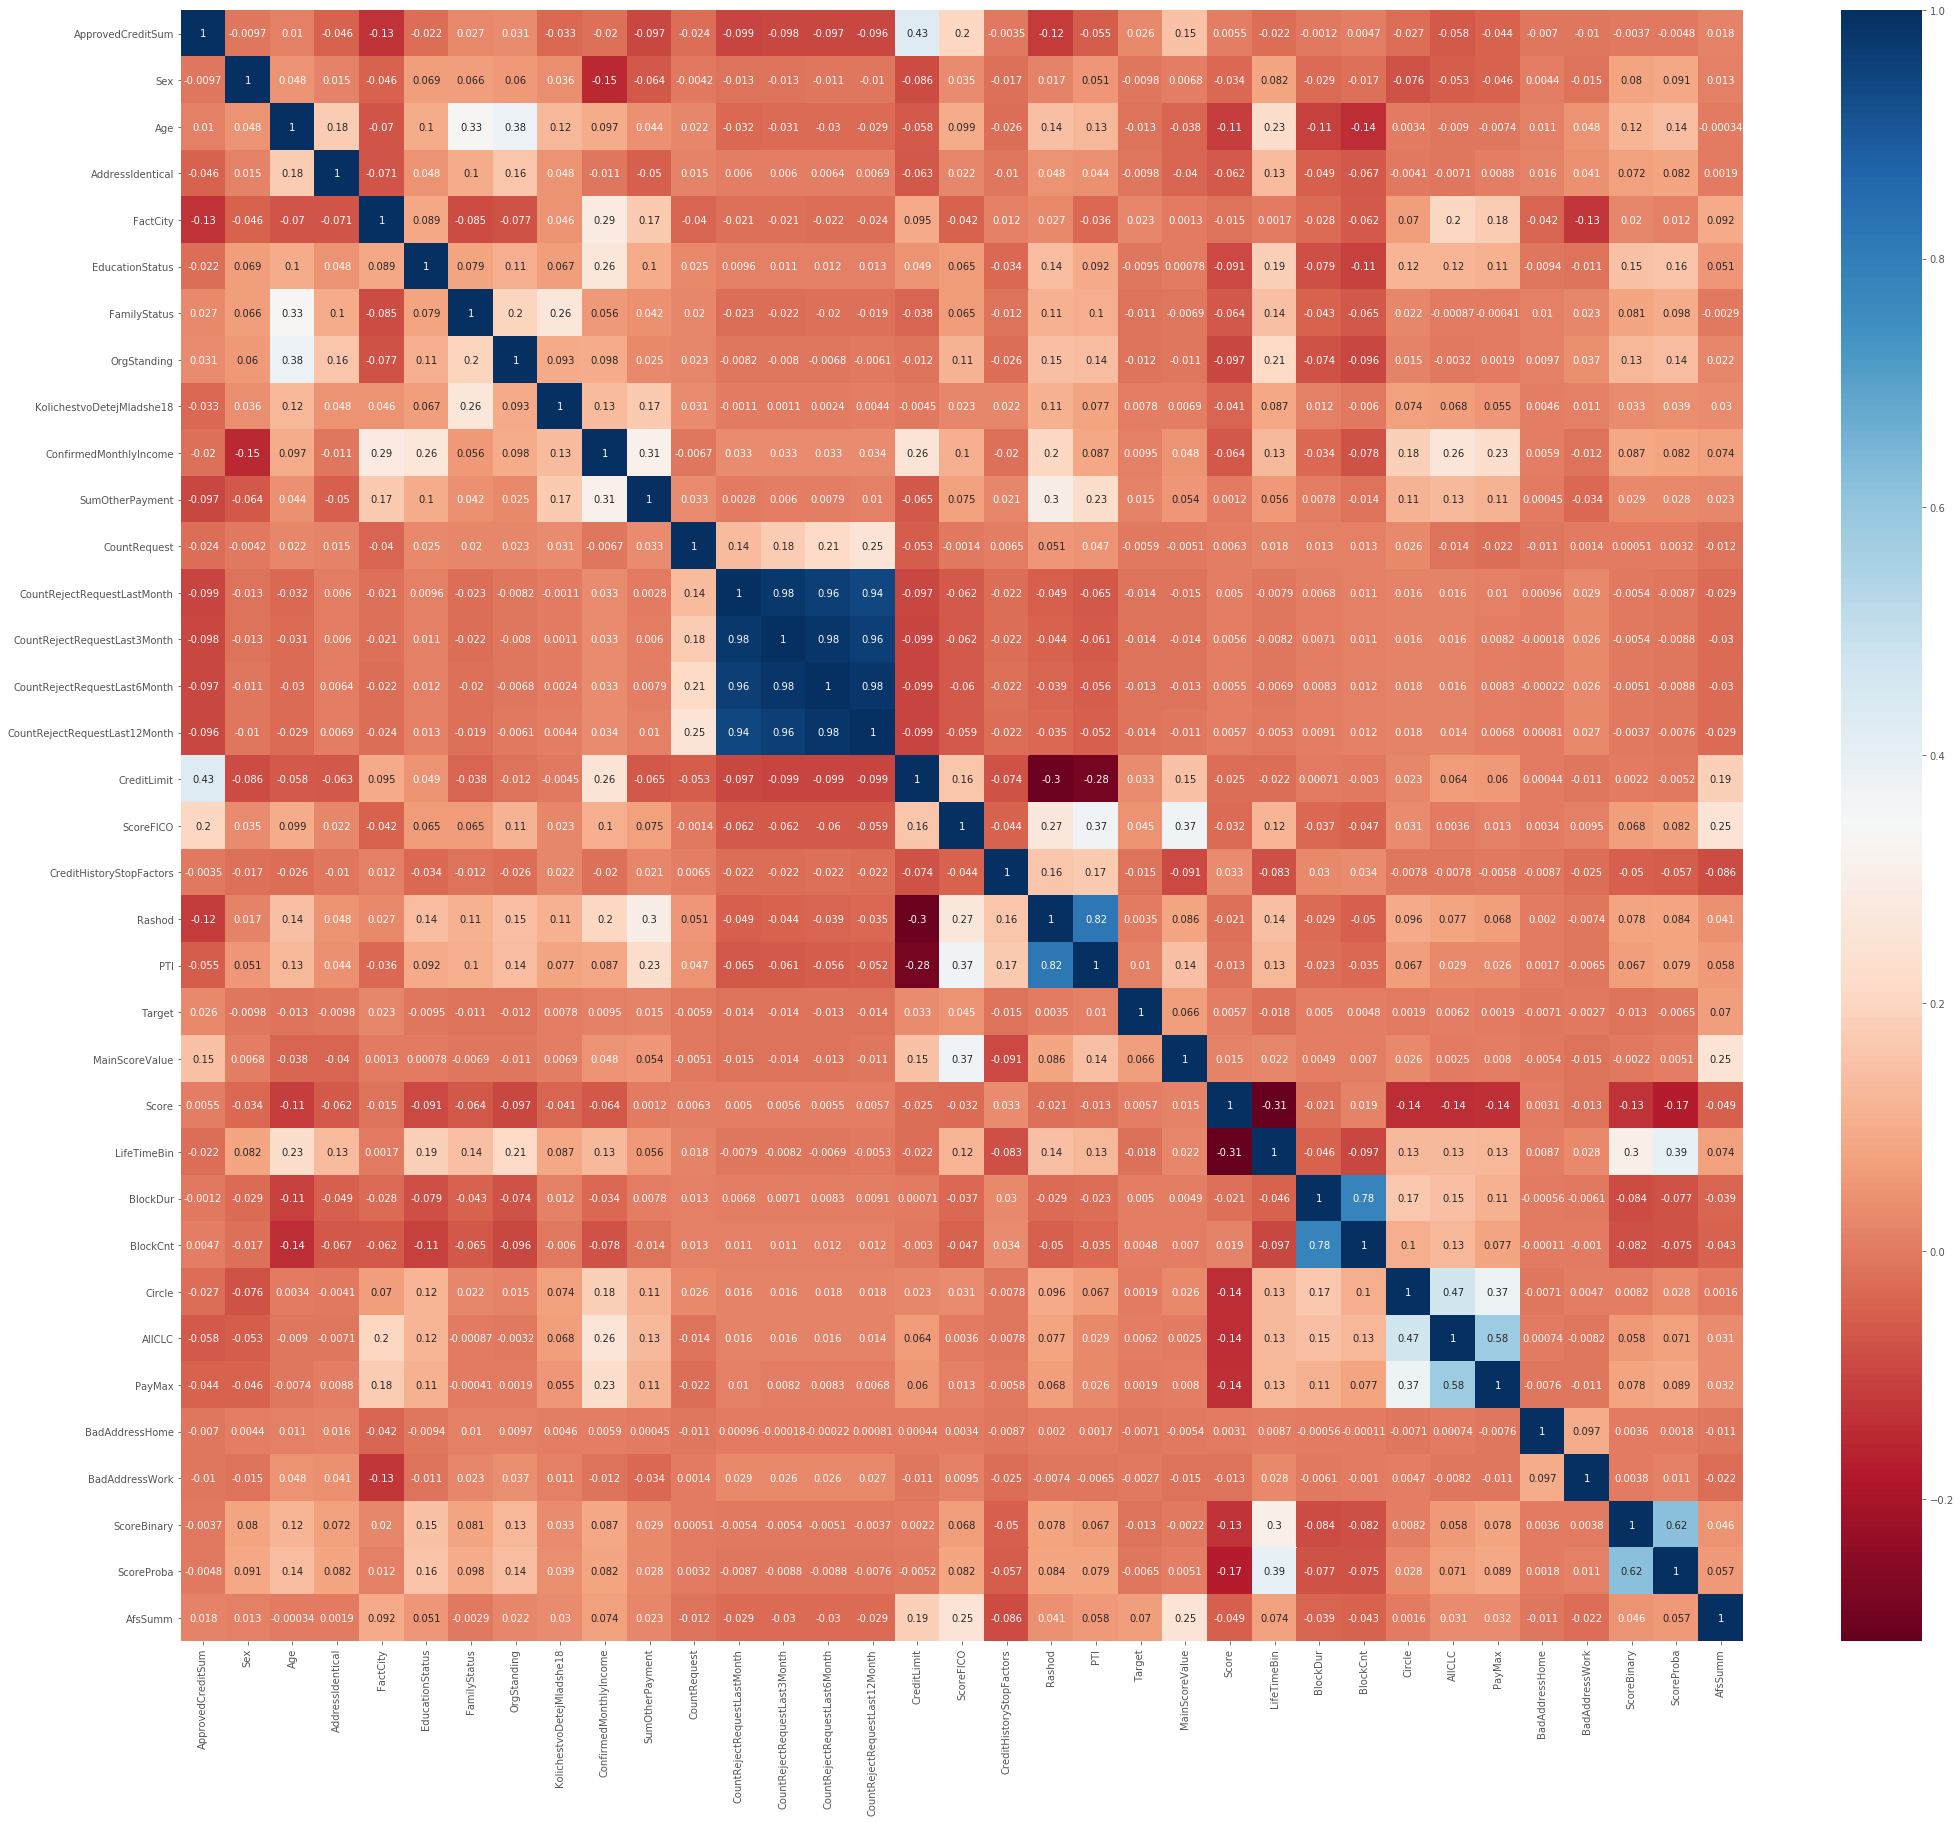

In [9]:
ax, fig = plt.subplots(figsize=(35,30))
sns.heatmap(df.corr(method="kendall"), annot=True, cmap='RdBu')
plt.show()

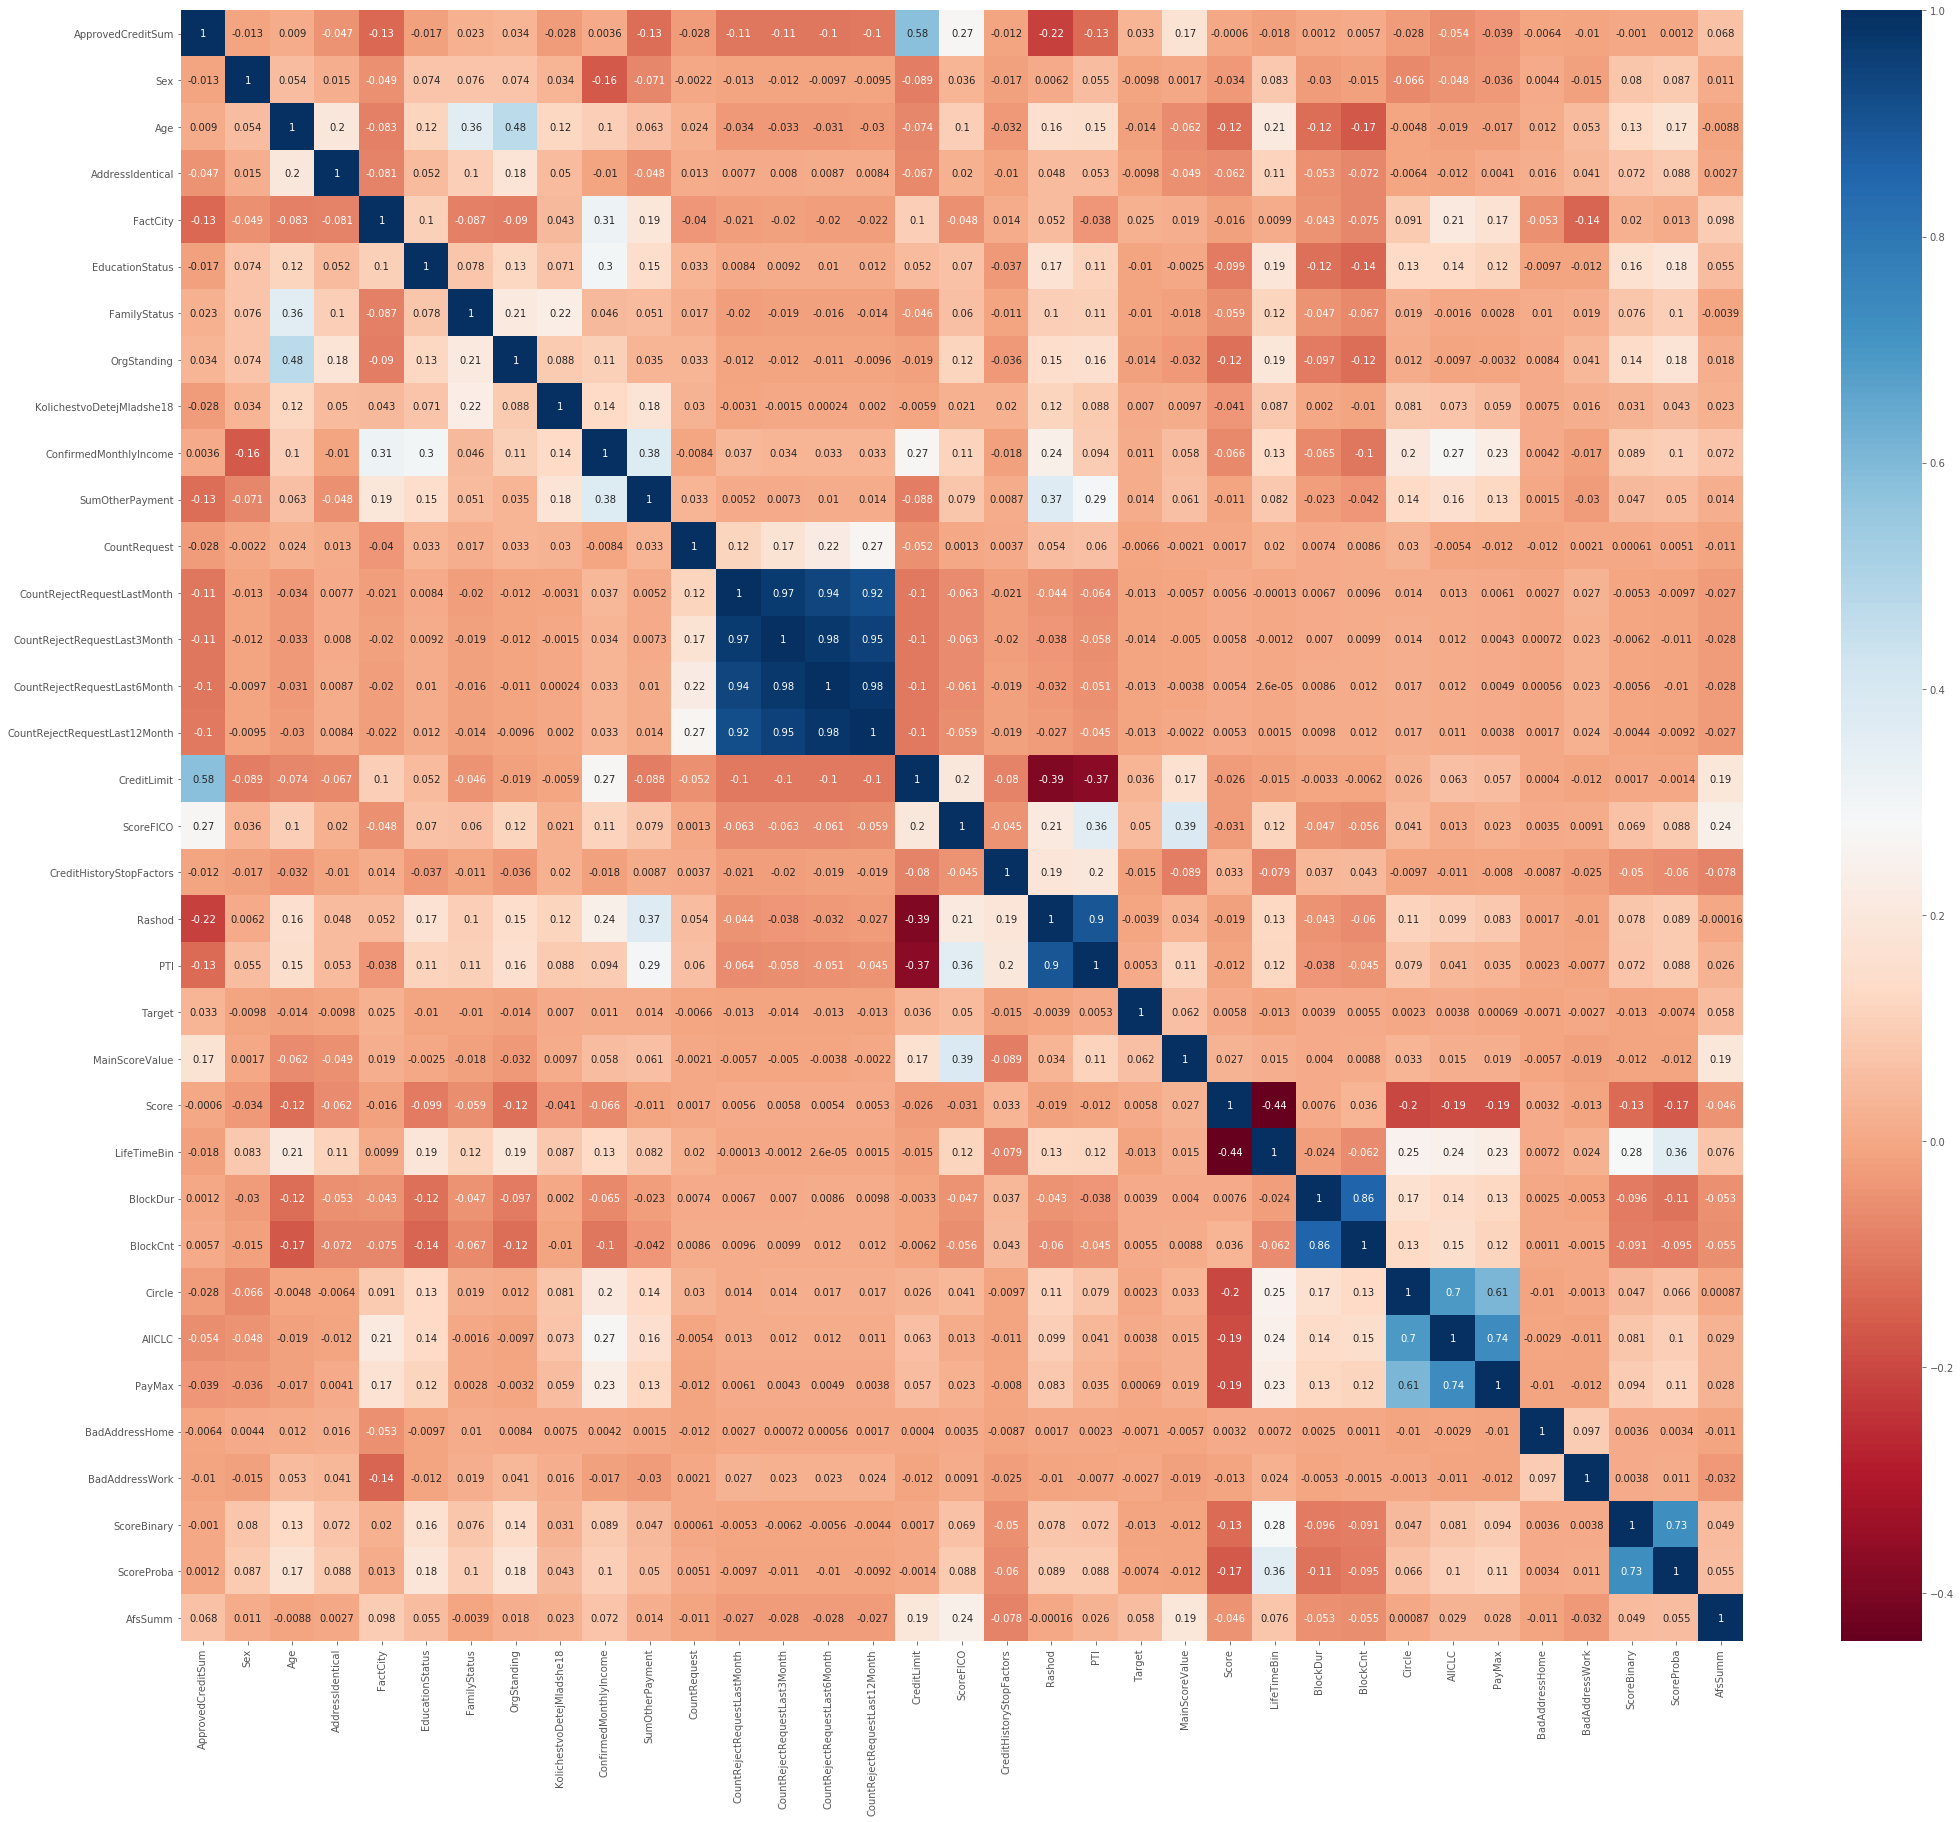

In [10]:
ax, fig = plt.subplots(figsize=(35,30))
sns.heatmap(df.corr(method="pearson"), annot=True, cmap='RdBu')
plt.show()

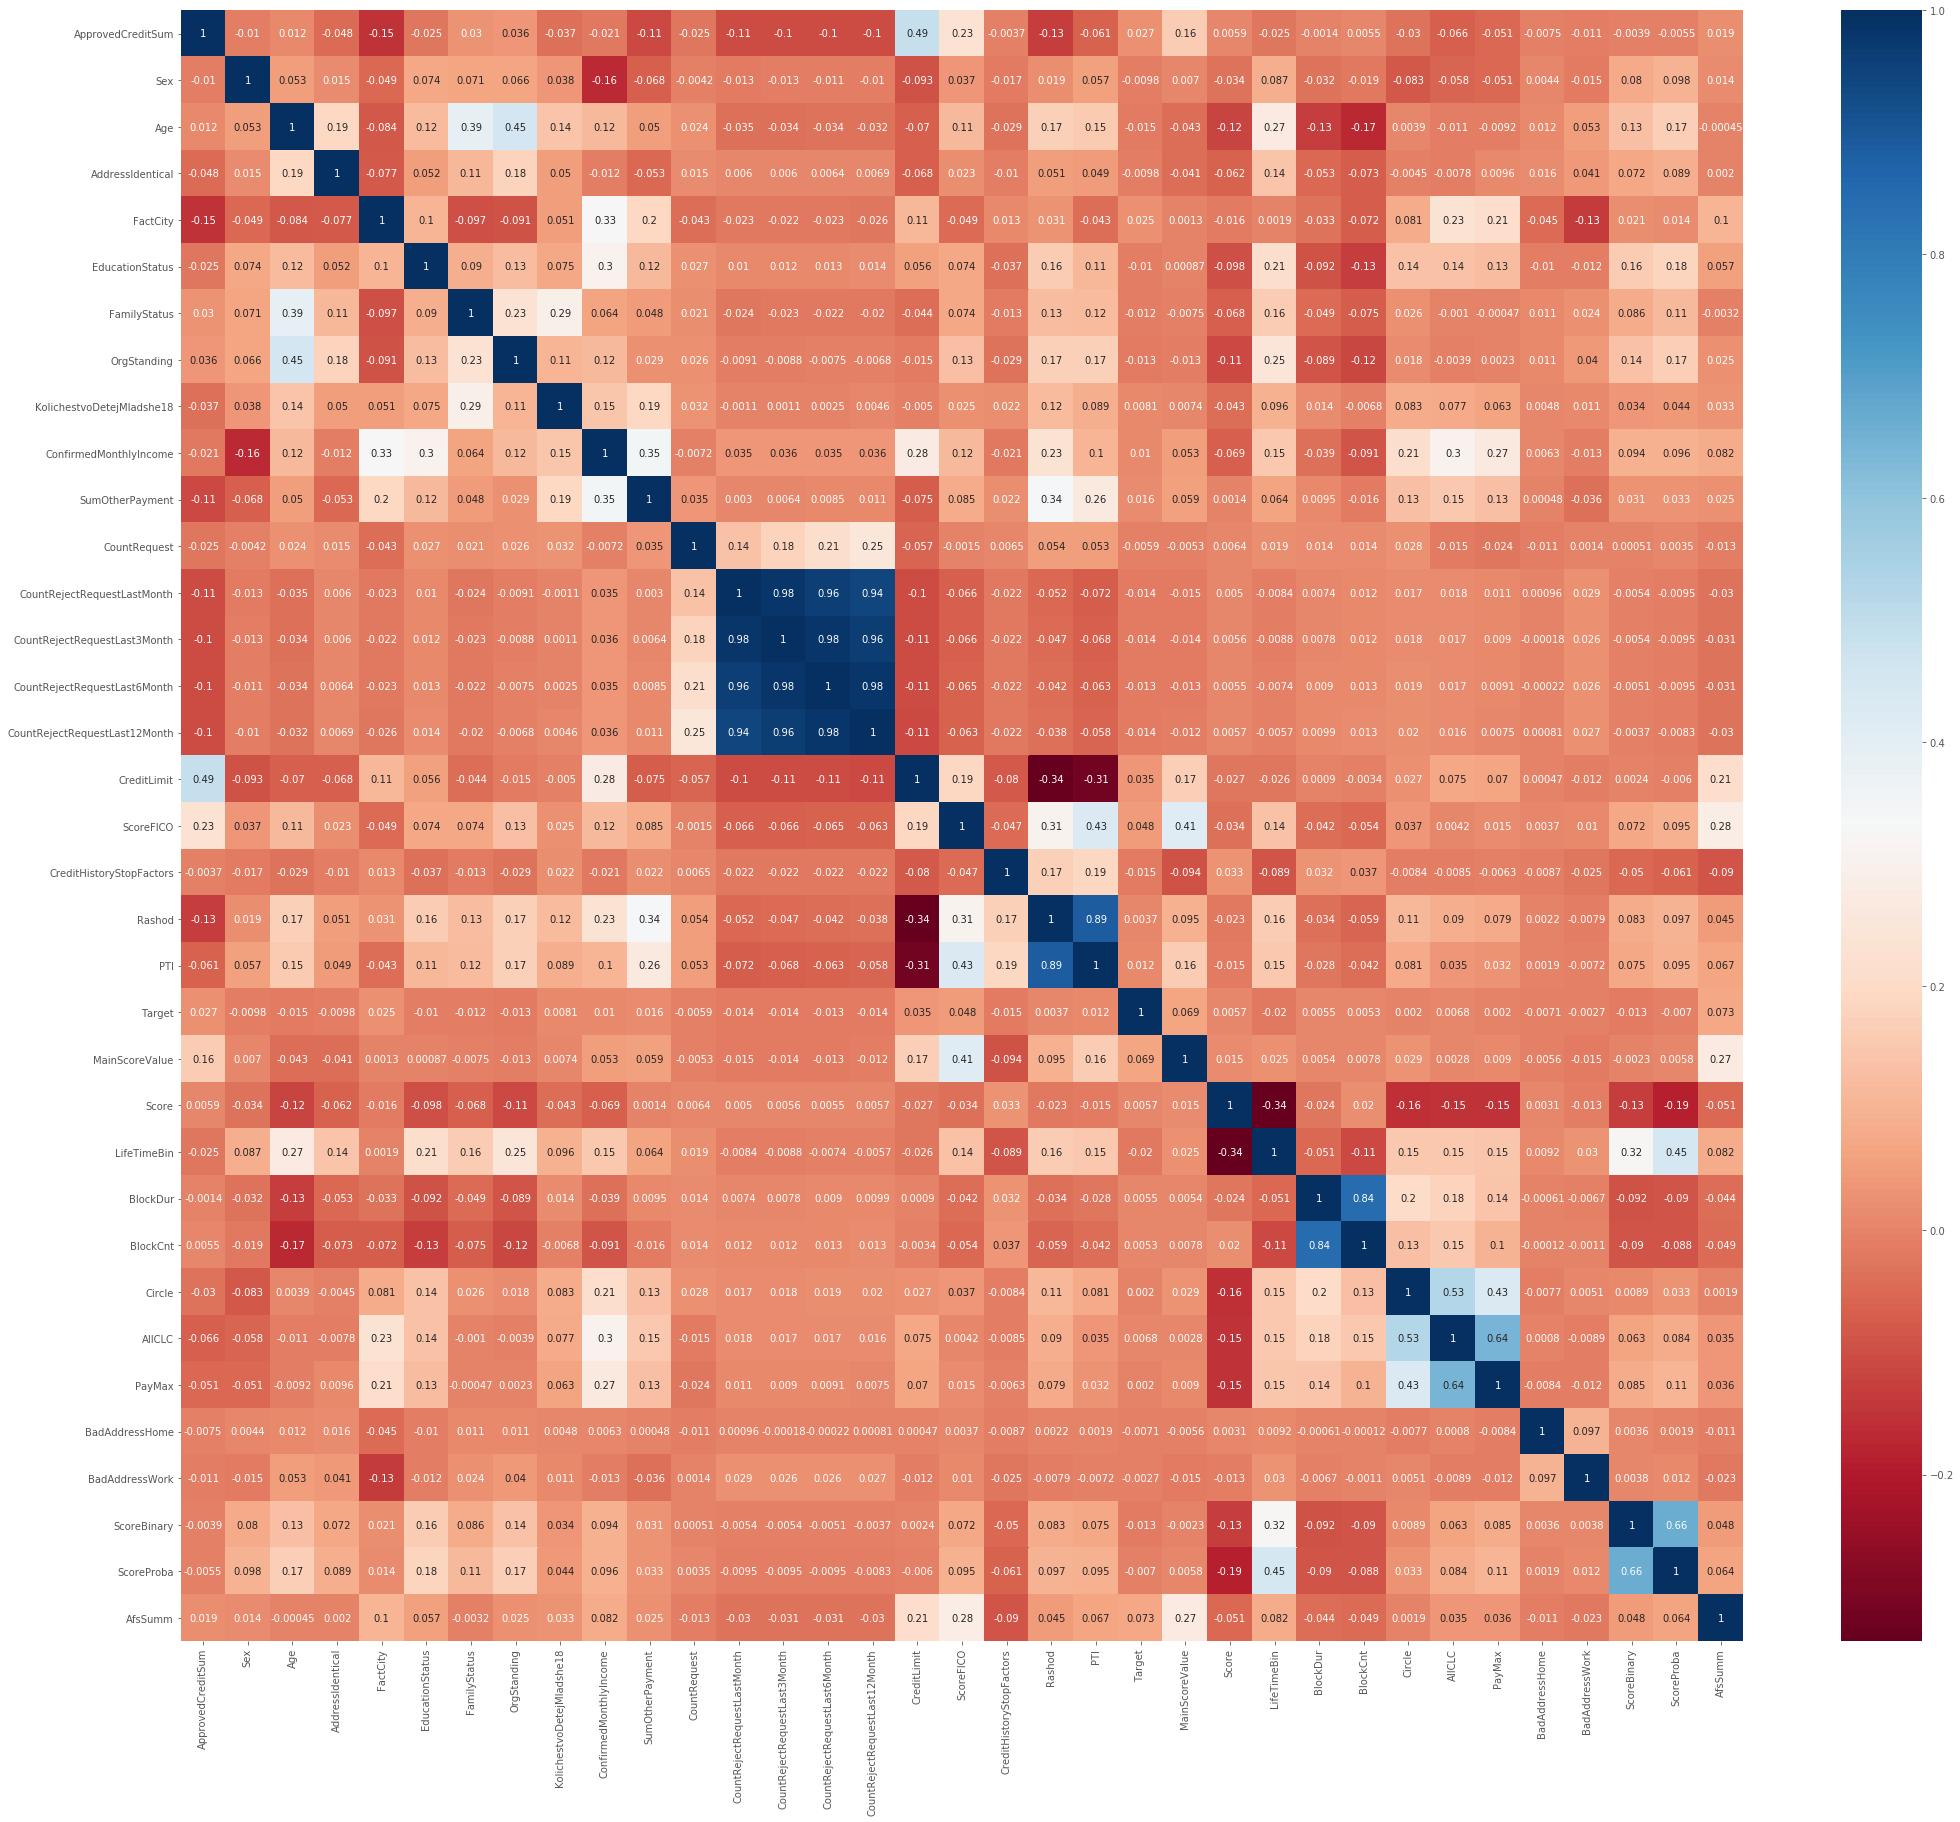

In [11]:
ax, fig = plt.subplots(figsize=(35,30))
sns.heatmap(df.corr(method="spearman"), annot=True, cmap='RdBu')
plt.show()

### Разделение датафрейма на выборки train и test

Выделим отдельный датафрейм для target-переменной

In [12]:
target = df['Target']
data = df.drop(columns=['Target', 'APPLICID']) # Удаляем APPLICID т.к. он является ключом и не играет роли в анализе

Разделим датафрейм на учебную и тестовую выборки в соотношении 70% на 30%

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.3, random_state=30)

## Анализ данных: 
### Решающее дерево
Решающее дерево — средство поддержки принятия решений, использующееся в машинном обучении, анализе данных и статистике. Структура дерева представляет собой «листья» и «ветки». На рёбрах («ветках») дерева решения записаны атрибуты, от которых зависит целевая функция, в «листьях» записаны значения целевой функции, а в остальных узлах — атрибуты, по которым различаются случаи. Чтобы классифицировать новый случай, надо спуститься по дереву до листа и выдать соответствующее значение

Параметры:
- solver='newton-cg' - обрабатывать L2 или не штрафовать, т.к. он выдал лучший результат на ROG AUC
- class_weight="balanced" - балансирует веса для всех выборок (default дает всем одинаковый вес)

In [14]:
descision_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=5, class_weight='balanced')
descision_tree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=8, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

Проверим полученную модель
- На train выборке

In [15]:
print(round(descision_tree.score(X_train, Y_train)*100,2), '%')

80.34 %


- На test выборке

In [16]:
print(round(descision_tree.score(X_test, Y_test)*100,2),'%')

80.4 %


Выведем матрицу ошибок

In [17]:
confusion_matrix(Y_test, descision_tree.predict(X_test))

array([[13593,  3286],
       [   44,    71]], dtype=int64)

Выведем отчет классификации

In [18]:
Y_pred_tree = descision_tree.predict(X_test)

print("Classification Report")
print(metrics.classification_report(Y_test, Y_pred_tree,digits=4))

Classification Report
              precision    recall  f1-score   support

           0     0.9968    0.8053    0.8909     16879
           1     0.0211    0.6174    0.0409       115

    accuracy                         0.8040     16994
   macro avg     0.5090    0.7114    0.4659     16994
weighted avg     0.9902    0.8040    0.8851     16994



Выведем некоторые метрики

In [19]:
Y_score_tree = descision_tree.predict(X_test)

print('Accuracy: ' + str(metrics.accuracy_score(Y_test, Y_score_tree)))
print('Recall: ' + str(metrics.recall_score(Y_test, Y_score_tree)))
print('Precision: ' + str(metrics.precision_score(Y_test, Y_score_tree)))
print('F1 score: ' + str(metrics.f1_score(Y_test, Y_score_tree)))
print('balanced accuracy score: ' + str(metrics.balanced_accuracy_score(Y_test, Y_score_tree)))
print('Matthews correlation coefficient: ' + str(metrics.matthews_corrcoef(Y_test, Y_score_tree)))
print('Cohen Kappa score: ' + str(metrics.cohen_kappa_score(Y_test, Y_score_tree)))

Accuracy: 0.8040484877015417
Recall: 0.6173913043478261
Precision: 0.02114983616324099
F1 score: 0.040898617511520734
balanced accuracy score: 0.7113557623700146
Matthews correlation coefficient: 0.08704248361612112
Cohen Kappa score: 0.028181490365502215


Выведем график ROC-кривой

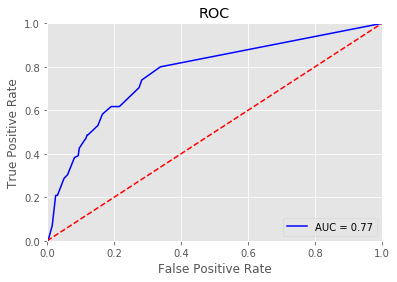

In [20]:
probs = descision_tree.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Визуализируем дерево решений

In [21]:
export_graphviz(descision_tree, out_file='Descision_Tree.dot',  filled=True, rounded=True, special_characters=True, 
                class_names=['0','1'])

In [22]:
(graph, ) = p.graph_from_dot_file('Descision_Tree.dot')

In [23]:
graph.write_png('Descision_Tree.png')

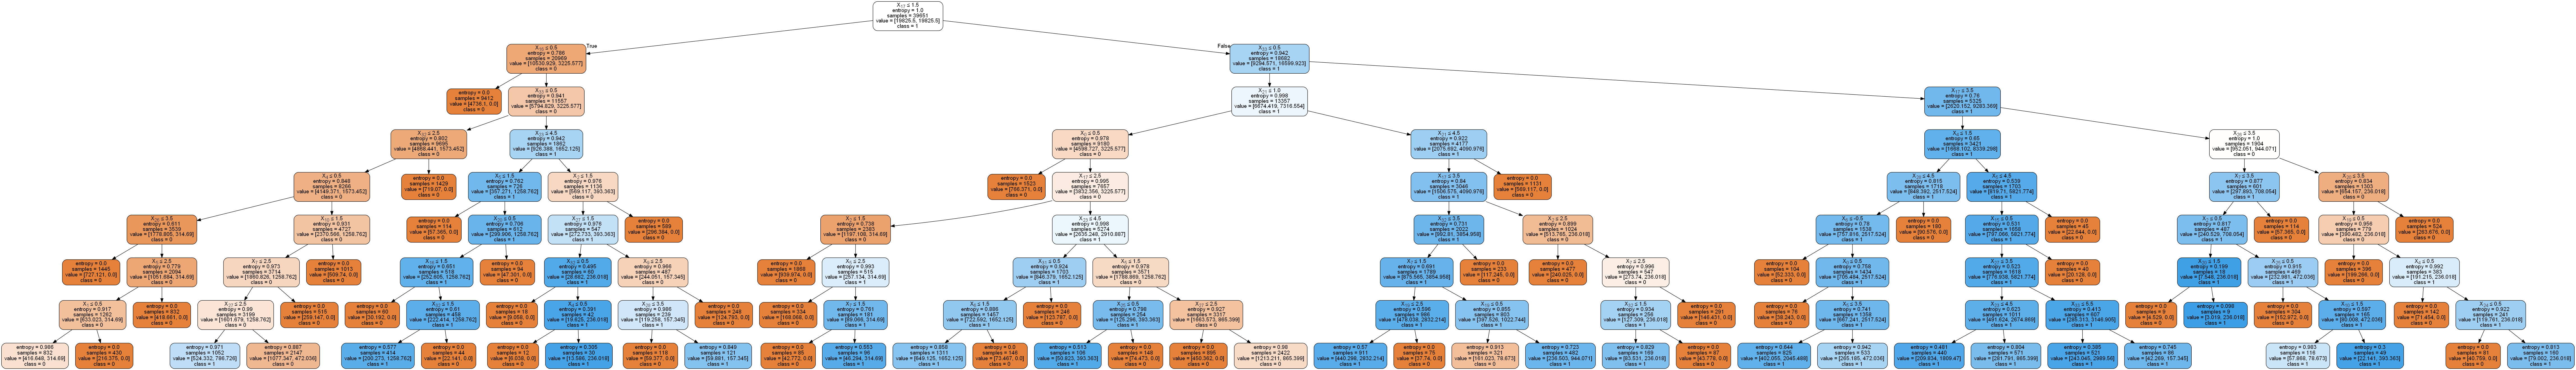

### Логистическая регрессия
Логистическая регрессия - это статистическая модель, используемая для прогнозирования вероятности возникновения некоторого события путём его сравнения с логистической кривой. Эта регреcсия выдаёт ответ в виде вероятности бинарного события (1 или 0).

Параметры:
- solver='newton-cg' - обрабатывать L2 или не штрафовать, т.к. он выдал лучший результат на ROG AUC
- class_weight="balanced" - балансирует веса для всех выборок (default дает всем одинаковый вес)

Обучаем на учебной выборке

In [24]:
log_reg = LogisticRegression(solver='newton-cg', class_weight="balanced")
log_reg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

Проверим полученную модель
- На train выборке

In [25]:
print(round(log_reg.score(X_train, Y_train)*100,2), '%')

71.74 %


- На test выборке

In [26]:
print(round(log_reg.score(X_test, Y_test)*100,2), '%')

71.73 %


Выведем матрицу ошибок

In [27]:
confusion_matrix(Y_test, log_reg.predict(X_test))

array([[12110,  4769],
       [   36,    79]], dtype=int64)

Выведем отчет классификации

In [28]:
print("Classification Report")
print(metrics.classification_report(Y_test, log_reg.predict(X_test),digits=4))

Classification Report
              precision    recall  f1-score   support

           0     0.9970    0.7175    0.8345     16879
           1     0.0163    0.6870    0.0318       115

    accuracy                         0.7173     16994
   macro avg     0.5067    0.7022    0.4331     16994
weighted avg     0.9904    0.7173    0.8290     16994



Выведем некоторые метрики

In [29]:
Y_score = log_reg.predict(X_test)

print('Accuracy: ' + str(metrics.accuracy_score(Y_test, Y_score)))
print('Recall: ' + str(metrics.recall_score(Y_test, Y_score)))
print('Precision: ' + str(metrics.precision_score(Y_test, Y_score)))
print('F1 score: ' + str(metrics.f1_score(Y_test, Y_score)))
print('balanced accuracy score: ' + str(metrics.balanced_accuracy_score(Y_test, Y_score)))
print('Matthews correlation coefficient: ' + str(metrics.matthews_corrcoef(Y_test, Y_score)))
print('Cohen Kappa score: ' + str(metrics.cohen_kappa_score(Y_test, Y_score)))

Accuracy: 0.7172531481699423
Recall: 0.6869565217391305
Precision: 0.016295379537953795
F1 score: 0.03183558331654241
balanced accuracy score: 0.7022080434396227
Matthews correlation coefficient: 0.07342648784901243
Cohen Kappa score: 0.018864400147540095


Выведем график ROC-кривой

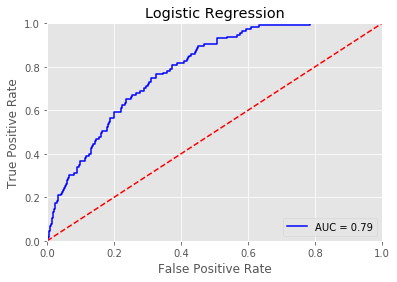

In [30]:
probs = log_reg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Logistic Regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Random Forest
Случайный лес — композиция решающих деревьев. Данный алгоритм позволяет с наибольшей, относительно решающих деревьев точностью, строить модели и значительно уменьшает возможность переобучения, в то же время данный метод является сильно ресурсоемким.

Параметры:
- n_estimators - количество деревьев, которые будут построены

In [31]:
rand_for = RandomForestClassifier(n_estimators = 51, max_depth=11, class_weight= 'balanced')
rand_for.fit(X_train, Y_train);

Проверим полученную модель
- На train выборке

In [32]:
print(round(rand_for.score(X_train, Y_train)*100,2), '%')

96.74 %


- На test выборке

In [33]:
print(round(rand_for.score(X_test, Y_test)*100,2), '%')

96.05 %


Выведем матрицу ошибок

In [35]:
confusion_matrix(Y_test,  rand_for.predict(X_test).round())

array([[16292,   587],
       [   84,    31]], dtype=int64)

Выведем отчет классификации

In [ ]:
print("Classification Report")
print(metrics.classification_report(Y_test, rand_for.predict(X_test).round(),digits=4))

Выведем некоторые метрики

In [ ]:
Y_score_rf = rand_for.predict(X_test)

print('Accuracy: ' + str(metrics.accuracy_score(Y_test, Y_score_rf)))
print('Recall: ' + str(metrics.recall_score(Y_test, Y_score_rf)))
print('Precision: ' + str(metrics.precision_score(Y_test, Y_score_rf)))
print('F1 score: ' + str(metrics.f1_score(Y_test, Y_score_rf)))
print('balanced accuracy score: ' + str(metrics.balanced_accuracy_score(Y_test, Y_score_rf)))
print('Matthews correlation coefficient: ' + str(metrics.matthews_corrcoef(Y_test, Y_score_rf)))
print('Cohen Kappa score: ' + str(metrics.cohen_kappa_score(Y_test, Y_score_rf)))

In [ ]:
probs = rand_for.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Random Forest')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Итог

Объединим ROC кривые всех 3 методов

In [ ]:
probs_tree = descision_tree.predict_proba(X_test)
preds_tree = probs_tree[:,1]
fpr_tree, tpr_tree, threshold_tree = metrics.roc_curve(Y_test, preds_tree)
roc_auc_tree = metrics.auc(fpr_tree, tpr_tree)

probs_log_reg = log_reg.predict_proba(X_test)
preds_log_reg = probs_log_reg[:,1]
fpr_log_reg, tpr_log_reg, threshold_log_reg = metrics.roc_curve(Y_test, preds_log_reg)
roc_auc_log_reg = metrics.auc(fpr_log_reg, tpr_log_reg)

probs_rand_for = rand_for.predict_proba(X_test)
preds_rand_for = probs_rand_for[:,1]
fpr_rand_for, tpr_rand_for, threshold_rand_for = metrics.roc_curve(Y_test, preds_rand_for)
roc_auc_rand_for = metrics.auc(fpr_rand_for, tpr_rand_for)

plt.title('Total')
plt.plot(fpr_tree, tpr_tree, 'b', label = 'DT = %0.2f' % roc_auc_tree)
plt.plot(fpr_log_reg, tpr_log_reg, 'g', label = 'LR = %0.2f' % roc_auc_log_reg)
plt.plot(fpr_rand_for, tpr_rand_for, 'c', label = 'RF = %0.2f' % roc_auc_rand_for)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Проведя ислледование данных Sovest на поиск наилучшей модели для предсказания того, выдаст полученный кредит клиент или нет.

Наиболее значиными критериями оказались : 
- балл FICO
- общий балл по FPS
- общий балл по AFS

После анализа оценок, получившихся в результате построения моделей классификации,
таких как логистическая регрессия, дерево решений и рандомный лес, хоть и результаты не сильно отличаются, можно сделать вывод, что лучшей моделью оказался Random Forest